## Exploring the Relationship Between Hospital Spending and Patient Reported Quality of Care

This notebook was originally submitted as a final data exploration project for DATA 8 (Foundations of Data Science) At UC Berkeley in Spring 2017. Excluding the first cell (required for submission), all work is original. 

In [ ]:
# Run this cell to 
# - create necessary support files, 
# - check that your exploration is formatted correctly, 
# - and submit your work to OK.

ok_spec = """
{
  "name": "Independent Data Exploration",
  "endpoint": "cal/data8/sp17/exploration",
  "src": [
    "exploration.ipynb"
  ],
  "tests": {},
  "protocols": [
      "file_contents",
      "backup"
  ]
}    
"""
    
ok_test = '''
test = {
  'name': 'Check file name',
  'points': 1,
  'suites': [
    {
      'cases': [
        {
          'code': r"""
          >>> # Make sure that you name your submission file exploration.ipynb
          >>> import os
          >>> os.path.exists('exploration.ipynb')
          True
          """,
          'hidden': False,
          'locked': False
        },
      ],
      'scored': True,
      'setup': '',
      'teardown': '',
      'type': 'doctest'
    }
  ]
}
'''
    
import os

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from datascience import *
    
if not os.path.exists('exploration.ok'):
    with open('exploration.ok', 'w') as out:
        out.write(ok_spec)

if not os.path.exists('tests/q1.py'):
    with open('tests/q1.py', 'w') as out:
        out.write(ok_test)
    
from client.api.notebook import Notebook
ok = Notebook('exploration.ok')
ok.auth(inline=True)
ok.grade('q1')
_ = ok.submit()

In [5]:
gen_info = Table.read_table('Hospital_General_Information.csv')#.where('State', are.equal_to('CA'))
spending_by_patient = Table.read_table('Medicare_Hospital_Spending_Per_Patient_-_Hospital.csv')#.where('State', are.equal_to('CA'))
value_of_care =  Table.read_table('Payment_and_value_of_care_-_Hospital.csv')#.where('State', are.equal_to('CA'))

In [6]:
def convert_string_to_int(array):
    new_array = []
    for i in np.arange(len(array)):
        money_float = int(array.item(i).replace('$', "").replace(',',""))
        new_array = np.append(new_array, money_float)
    return new_array

In [160]:
def convert_string_to_float(array):
    new_array = []
    for i in np.arange(len(array)):
        money_float = float(array.item(i))
        new_array = np.append(new_array, money_float)
    return new_array

In [7]:
payments = convert_string_to_int(value_of_care.where('Payment', are.not_equal_to('Not Available')).where('Lower estimate', are.not_equal_to('Not Available')).where('Higher estimate', are.not_equal_to('Not Available')).column('Payment'))
low_estimate = convert_string_to_int(value_of_care.where('Payment', are.not_equal_to('Not Available')).where('Lower estimate', are.not_equal_to('Not Available')).where('Higher estimate', are.not_equal_to('Not Available')).column('Lower estimate'))
high_estimate = convert_string_to_int(value_of_care.where('Payment', are.not_equal_to('Not Available')).where('Lower estimate', are.not_equal_to('Not Available')).where('Higher estimate', are.not_equal_to('Not Available')).column('Higher estimate'))
payments_converted = Table().with_column(
    'Provider ID', value_of_care.where('Payment', are.not_equal_to('Not Available')).where('Lower estimate', are.not_equal_to('Not Available')).where('Higher estimate', are.not_equal_to('Not Available')).column('Provider ID'),
    'Hospital Name', value_of_care.where('Payment', are.not_equal_to('Not Available')).where('Lower estimate', are.not_equal_to('Not Available')).where('Higher estimate', are.not_equal_to('Not Available')).column('Hospital name'),
    'Payment measure name', value_of_care.where('Payment', are.not_equal_to('Not Available')).where('Lower estimate', are.not_equal_to('Not Available')).where('Higher estimate', are.not_equal_to('Not Available')).column('Payment measure name'),
    'Payment Category',value_of_care.where('Payment', are.not_equal_to('Not Available')).where('Lower estimate', are.not_equal_to('Not Available')).where('Higher estimate', are.not_equal_to('Not Available')).column('Payment category'),
    'Payment', payments,
    'Lower Estimate', low_estimate,
    'Higher Estimate', high_estimate,
)

payments_converted = payments_converted.with_column(
    'Estimate Range', payments_converted.column(6) - payments_converted.column(5))

payments_converted.show(3)

Provider ID,Hospital Name,Payment measure name,Payment Category,Payment,Lower Estimate,Higher Estimate,Estimate Range
10005,MARSHALL MEDICAL CENTER SOUTH,Payment for heart attack patients,No Different than the National Average Payment,23171,20404,26226,5822
10005,MARSHALL MEDICAL CENTER SOUTH,Payment for heart failure patients,No Different than the National Average Payment,16376,15237,17547,2310
10005,MARSHALL MEDICAL CENTER SOUTH,Payment for pneumonia patients,No Different than the National Average Payment,14384,13642,15118,1476


# Quantative Visualization

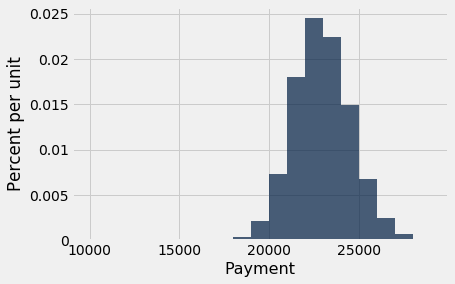

In [8]:
payments_converted.where('Payment measure name', 'Payment for heart attack patients').hist('Payment', bins=np.arange(10000,30000,1000))

In [49]:
heart_attack_payment_avg = np.mean(payments_converted.where('Payment measure name', 'Payment for heart attack patients').column('Payment'))
print("Average")
print(np.round(heart_attack_payment_avg))
high = payments_converted.where('Payment measure name', 'Payment for heart attack patients').sort('Payment', descending = True).column('Payment').item(0)
print("Max")
print(high)
low = min(payments_converted.where('Payment measure name', 'Payment for heart attack patients').sort('Payment', descending = False).column('Payment'))
print("Low")
print(low)

Average
22962.0
Max
30334.0
Low
12814.0


This table shows the distribution of payments for patients who had heart attacks with the average being about $22,962.
The distribution shows that most of the payments were around the average, with very few near the maximum and minimum payments.

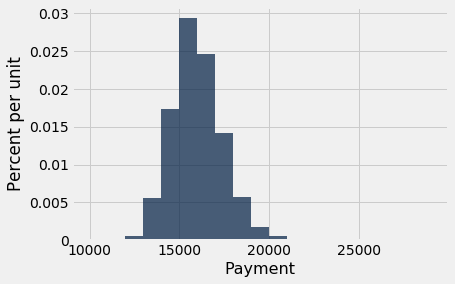

In [9]:
payments_converted.where('Payment measure name', 'Payment for heart failure patients').hist('Payment', bins=np.arange(10000,30000,1000))

In [50]:
heart_failure_payment_avg = np.mean(payments_converted.where('Payment measure name', 'Payment for heart failure patients').column('Payment'))
print("Average")
print(np.round(heart_failure_payment_avg))
high = payments_converted.where('Payment measure name', 'Payment for heart failure patients').sort('Payment', descending = True).column('Payment').item(0)
print("Max")
print(high)
low = min(payments_converted.where('Payment measure name', 'Payment for heart failure patients').sort('Payment', descending = False).column('Payment'))
print("Low")
print(low)

Average
16014.0
Max
22416.0
Low
11648.0


This table shows the distribution of payments for patients who had heart failure with the average being about $16014.
The distribution also shows that most of the payments were around the average, with very few near the maximum and minimum payments.

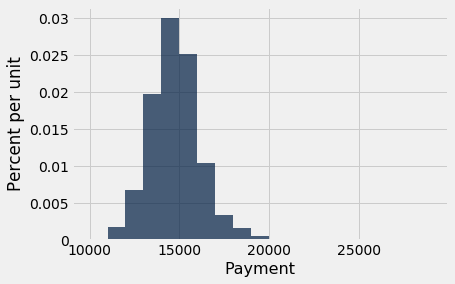

In [10]:
payments_converted.where('Payment measure name', 'Payment for pneumonia patients').hist('Payment', bins=np.arange(10000,30000,1000))

In [51]:
pneumonia_payment_avg = np.mean(payments_converted.where('Payment measure name', 'Payment for pneumonia patients').column('Payment'))
print("Average")
print(np.round(pneumonia_payment_avg))
high = payments_converted.where('Payment measure name', 'Payment for pneumonia patients').sort('Payment', descending = True).column('Payment').item(0)
print("Max")
print(high)
low = min(payments_converted.where('Payment measure name', 'Payment for pneumonia patients').sort('Payment', descending = False).column('Payment'))
print("Low")
print(low)

Average
14790.0
Max
22737.0
Low
9502.0


This table shows the distribution of payments for patients who had pneumonia with the average being about $14790.
The distribution again shows that most of the payments were around the average, with very few near the maximum and minimum payments.

All 3 histograms regarding the payments for treatments for heart attacks, heart failure, and pneumonia show that payments don't often vary that much from the average of all payments. There is variation though, probably due to difference in wealth levels of some areas.

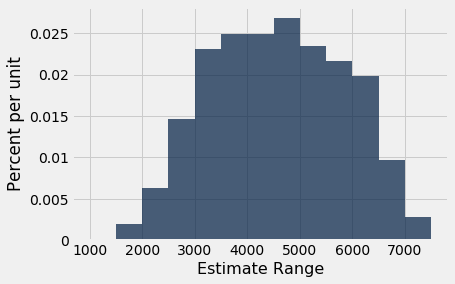

In [11]:
payments_converted.where('Payment measure name', 'Payment for heart attack patients').hist('Estimate Range', bins=np.arange(1000,8000,500))

In [56]:
avg = np.mean(payments_converted.where('Payment measure name', 'Payment for heart attack patients').column('Estimate Range'))
high_range = payments_converted.where('Payment measure name', 'Payment for heart attack patients').sort('Estimate Range', descending = True).column('Estimate Range').item(0)
low_range = payments_converted.where('Payment measure name', 'Payment for heart attack patients').sort('Estimate Range', descending = False).column('Estimate Range').item(0)
print("Average")
print(avg)
print("High Range")
print(high_range)
print("Low Range")
print(low_range)

Average
4592.7753097
High Range
7823.0
Low Range
1524.0


For heart attack patients, their average difference from the high estimate and the low estimate of payment was about $4592. The histogram depicts many ranges for this type of condition but there seems to be an even distribution of the ranges among the highest and lowest range.

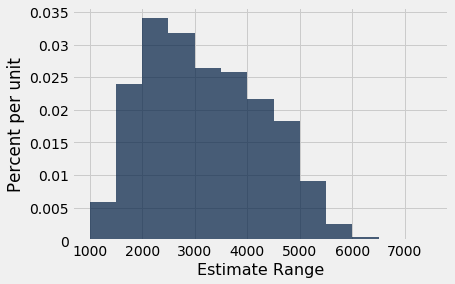

In [12]:
payments_converted.where('Payment measure name', 'Payment for heart failure patients').hist('Estimate Range', bins=np.arange(1000,8000,500))

In [57]:
avg = np.mean(payments_converted.where('Payment measure name', 'Payment for heart failure patients').column('Estimate Range'))
high_range = payments_converted.where('Payment measure name', 'Payment for heart failure patients').sort('Estimate Range', descending = True).column('Estimate Range').item(0)
low_range = payments_converted.where('Payment measure name', 'Payment for heart failure patients').sort('Estimate Range', descending = False).column('Estimate Range').item(0)
print("Average")
print(avg)
print("High Range")
print(high_range)
print("Low Range")
print(low_range)

Average
3198.42659904
High Range
6734.0
Low Range
917.0


For heart failure patients, their average difference from the high estimate and the low estimate of payment was about $3198. The histogram depicts many ranges for this type of condition but there also seems to be an even distribution of the ranges among the highest and lowest range. However, it generally leans to more of the cheaper side.

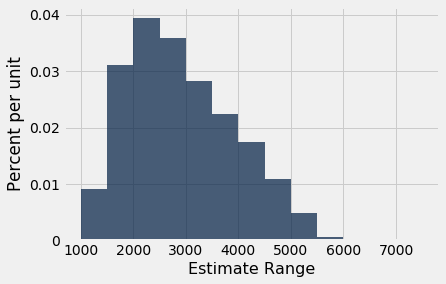

In [13]:
payments_converted.where('Payment measure name', 'Payment for pneumonia patients').hist('Estimate Range',bins=np.arange(1000,8000,500))

In [58]:
avg = np.mean(payments_converted.where('Payment measure name', 'Payment for pneumonia patients').column('Estimate Range'))
high_range = payments_converted.where('Payment measure name', 'Payment for pneumonia patients').sort('Estimate Range', descending = True).column('Estimate Range').item(0)
low_range = payments_converted.where('Payment measure name', 'Payment for pneumonia patients').sort('Estimate Range', descending = False).column('Estimate Range').item(0)
print("Average")
print(avg)
print("High Range")
print(high_range)
print("Low Range")
print(low_range)

Average
2922.30948795
High Range
6195.0
Low Range
849.0


For pneumonia patients, their average difference from the high estimate and the low estimate of payment was about $2922. The histogram depicts many ranges for this type of condition but there also seems to be an even distribution of the ranges among the highest and lowest range. However, as the price range increases, there appears to be fewer hospitals that have that large of a range, so estimates tend to be closer.

Overall, for heart failure and pneumonia patients, there wasn't much variation in the range because the difference tended to be closer to the lower end of prices. However, for heart attack patients the range seemed to be more spread out compared to the others. This difference could possibly be explained by the difficulty and potential outcomes of the treatment.

# Categorical Visualization

In [14]:
payment_standing = payments_converted.pivot('Payment Category', 'Payment measure name')
payment_standing

Payment measure name,Greater than the National Average Payment,Less than the National Average Payment,No Different than the National Average Payment
Payment for heart attack patients,254,178,1909
Payment for heart failure patients,603,366,2580
Payment for pneumonia patients,523,639,2822


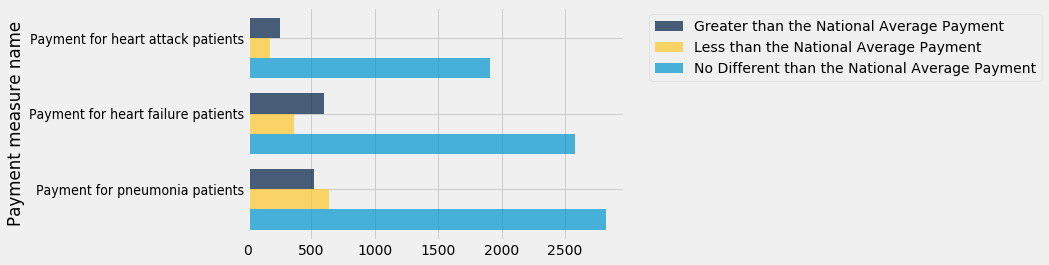

In [15]:
payment_standing.barh('Payment measure name')

This bar graph of the cost of treatments for illnesses of all the hospitals is a representation of whether or not those costs were above, below, or no different than the average national payment. From the overwhelmingly long light blue bar, we can see that hospitals usually charge the national average amount rather than below or above.

# Joining Data Sets

**Summarization of data and observational descriptions for join table are located in the prediction section**

In [178]:
hospital_spending_patient = gen_info.join('Hospital Name', spending_by_patient).drop('Provider ID_2','Address_2', 'City_2','State_2', 'ZIP Code_2', 'County Name_2', 'Phone Number_2','Location_2')
hospital_spending_patient_with_ratings = hospital_spending_patient.where('Hospital overall rating', are.not_equal_to('Not Available')).with_column(
    'Hospital overall rating (converted)', convert_string_to_int(hospital_spending_patient.where('Hospital overall rating', are.not_equal_to('Not Available')).column('Hospital overall rating'))
)
hospital_spending_patient_with_ratings.show(2)

Hospital Name,Provider ID,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location,Measure Name,Measure ID,Score,Footnote,Measure Start Date,Measure End Date,Hospital overall rating (converted)
ABBEVILLE AREA MEDICAL CENTER,421301,420 THOMSON CIRCLE,ABBEVILLE,SC,29620,ABBEVILLE,8643665011,Critical Access Hospitals,Government - Local,True,1,4,nan,Same as the National average,nan,Not Available,Results are not available for this reporting period,Same as the National average,nan,Above the National average,nan,Same as the National average,nan,Above the National average,nan,Same as the National average,nan,nan,Medicare hospital spending per patient (Medicare Spendin ...,MSPB_1,Not Available,5 - Results are not available for this reporting period.,01/01/2015,12/31/2015,4
ABBEVILLE GENERAL HOSPITAL,190034,118 N HOSPITAL DR,ABBEVILLE,LA,70510,VERMILION,3378935466,Acute Care Hospitals,Government - Hospital District or Authority,True,1,3,nan,Same as the National average,nan,Same as the National average,nan,Same as the National average,nan,Same as the National average,nan,Same as the National average,nan,Same as the National average,nan,Not Available,Results are not available for this reporting period,nan,Medicare hospital spending per patient (Medicare Spendin ...,MSPB_1,1.1,nan,01/01/2015,12/31/2015,3


In [179]:
hospitals_ranking = hospital_spending_patient_with_ratings.group('State', np.mean).select('State','Hospital overall rating (converted) mean')
hospitals_ranking.sort('Hospital overall rating (converted) mean', descending = True)

State,Hospital overall rating (converted) mean
SD,3.85714
DE,3.66667
WI,3.61111
MN,3.53165
ID,3.52632
IN,3.48148
NH,3.48
CO,3.45098
UT,3.44828
ME,3.4375


We grouped the table by state and the mean of their overall hospital ratings, to see which states had the best hospital on average. We found that hospitals in South Dakota were the highest rated, followed by Deleware, Wisconsin, Minnesota, and Idaho.

# Hypothesis Test

Null Hypothesis: If you choose a random hospital, its expected payment for heart attack treatment is no different than the National Average Payment more than 81% of the time, which is more often than not.

Alternative Hypothesis: If you choose a random hospital, its expected payment for heart attack treatment is different than the National Average Payment more than 81% of the time. 

In [180]:
hospital_spending_patient_with_ratings.group('State', np.mean).select('State','Hospital overall rating (converted) mean')

State,Hospital overall rating (converted) mean
AK,2.88889
AL,3.05063
AR,2.83636
AZ,2.94545
CA,2.84138
CO,3.45098
CT,2.71429
DC,1.42857
DE,3.66667
FL,2.65882


To test our hypothesis, we will create a test-statistic and run repeated simulations to find a p-value.

In [181]:
heart_attack = payment_standing.where("Payment measure name", are.equal_to("Payment for heart attack patients"))
total = heart_attack.column("Greater than the National Average Payment") + heart_attack.column("Less than the National Average Payment") + heart_attack.column("No Different than the National Average Payment")
total_sum = total[0]
observed_proportion = heart_attack.column("No Different than the National Average Payment").item(0)/total_sum
observed_proportion

0.81546347714651857

In [182]:
observed_statistic = abs(observed_proportion - 0.81)
observed_statistic

0.0054634771465185139

In [183]:
model_hospitals = make_array('Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 
                             'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 
                             'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 
                             'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 
                             'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 
                             'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 
                             'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 
                            'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same',
                            'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same', 'Same',
                             'Not Same', 'Not Same', 'Not Same', 'Not Same','Not Same', 'Not Same', 'Not Same', 'Not Same',
                            'Not Same', 'Not Same' ,'Not Same', 'Not Same','Not Same', 'Not Same', 'Not Same', 'Not Same',
                             'Not Same', 'Not Same', 'Not Same')
new_sample = np.random.choice(model_hospitals, total_sum) 

In [184]:
proportion_same = np.count_nonzero(new_sample == 'Same')/total_sum
abs(proportion_same - 0.81)

0.0041819735155915749

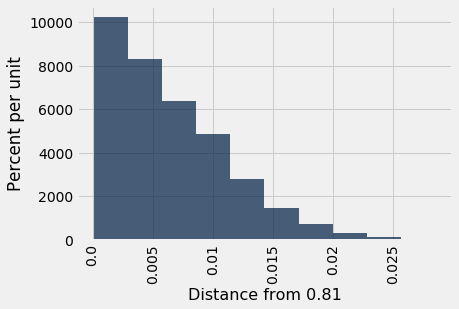

In [185]:
repetitions = 10000

sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = np.random.choice(model_hospitals, total_sum)
    proportion_same = np.count_nonzero(new_sample == 'Same')/total_sum
    sampled_stats = np.append(sampled_stats, abs(proportion_same - 0.81))

results = Table().with_column('Distance from 0.81', sampled_stats)
results.hist()

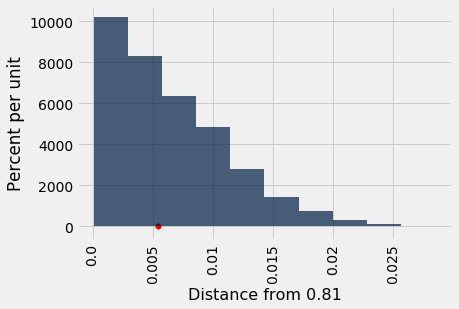

In [186]:
results.hist()
plots.scatter(observed_statistic, 0, color='red', s=30);

In [187]:
empirical_P = np.count_nonzero(sampled_stats >= observed_statistic)/repetitions
empirical_P

0.504

Conclusion: Based on the test conducted above, we found the observed value of the statistic which was 0.00546. This is just under 0.01. Therefore, the statistic based on the data on all the hospitals' cost of treatments is accurate, and the null hypothesis is true. We can conclude that more often than not, a hospital's requested payment will be no different than the average national payment.

# Prediction

The data set we selected had very few quantative categories, so we chose to try to predict a hospital's score based on how much they spend on patients. We specifically focused on hospital's payments towards heart attack patients and try to use that characteristic to predict the hospital's score. We will use a regression model, because we suspect a linear assocation. We predicted that hospitals that spent more on their patients would have a higher rating, since their expenses would translate over to their quality of care.

In [188]:
payments_and_scores= payments_converted.where('Payment measure name', 'Payment for heart attack patients').join('Hospital Name', hospital_spending_patient_with_ratings).where('Score', are.not_equal_to('Not Available')).select('Payment', 'Score')
payments_and_scores

Payment,Score
21099,0.95
21553,1.07
23950,1
25122,0.99
24202,1.03
24328,1.02
25084,0.96
23167,0.94
21060,0.98
23892,0.88


In order to prepare for our prediction problem, we joined the spending and value tables so we could compare hospital payments with hospital ratings. We expect to see high payments correlate to high scores, which is a trend that appears in the rows that are displayed.

In [189]:
payment_mean = np.mean(payments_and_scores.column(0))
payment_std = np.std(payments_and_scores.column(0))
score_mean = np.mean(convert_string_to_float(payments_and_scores.column(1)))
score_std = np.std(convert_string_to_float(payments_and_scores.column(1)))

payments_and_scores_standard = Table().with_columns(
    'Payment (standard units)', (convert_string_to_float(payments_and_scores.column(0))  - payment_mean)/payment_std,
    'Score (standard units)', (convert_string_to_float(payments_and_scores.column(1)) - score_mean)/score_std
)

payments_and_scores_standard

Payment (standard units),Score (standard units)
-1.19762,-0.710761
-0.91267,1.11409
0.591819,0.0495927
1.32743,-0.102478
0.749988,0.505805
0.829073,0.353734
1.30358,-0.55869
0.100365,-0.862832
-1.2221,-0.254549
0.555415,-1.77526


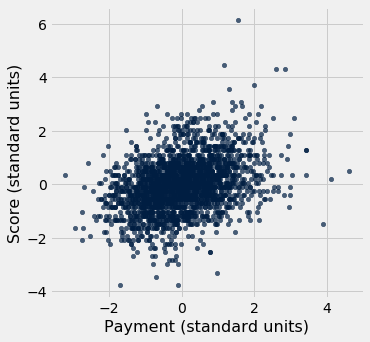

In [190]:
payments_and_scores_standard.scatter('Payment (standard units)')

In [191]:
r = np.mean(payments_and_scores_standard.column(0) * payments_and_scores_standard.column(0))
r

1.0

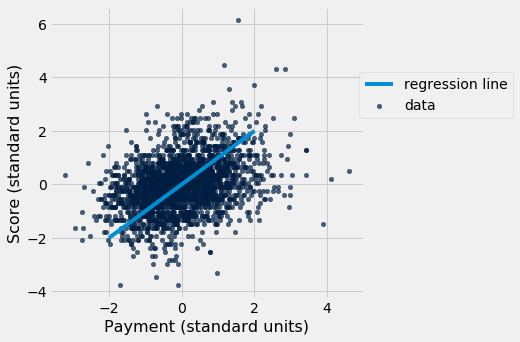

In [192]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    dataset.scatter(x, y, label="data")
    xs, ys = zip(point_0, point_1)
    plots.plot(xs, ys, label="regression line")
    plots.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(payments_and_scores_standard, 
                   "Payment (standard units)", 
                   "Score (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

In [193]:
slope = r * (score_std/payment_std)
slope

4.127387987011713e-05

In [194]:
intercept = slope*(-payment_mean) + score_mean
intercept

0.04714678501942493

In [195]:
score_predictions = payments_and_scores.with_column(
    'Predicted Score', slope*(payments_and_scores.column('Payment')-payment_mean) + score_mean
)

score_predictions = score_predictions.with_column(
    'Residual', convert_string_to_float(score_predictions.column(1)) - score_predictions.column(2),
)

score_predictions

Payment,Score,Predicted Score,Residual
21099,0.95,0.917984,0.0320156
21553,1.07,0.936723,0.133277
23950,1,1.03566,-0.0356562
25122,0.99,1.08403,-0.0940292
24202,1.03,1.04606,-0.0160572
24328,1.02,1.05126,-0.0312577
25084,0.96,1.08246,-0.122461
23167,0.94,1.00334,-0.0633388
21060,0.98,0.916375,0.0636253
23892,0.88,1.03326,-0.153262


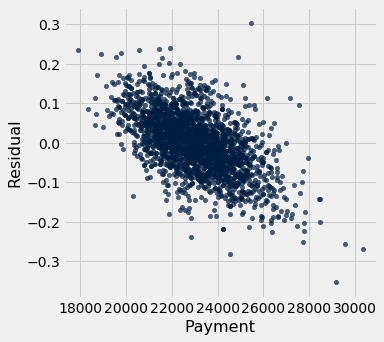

In [196]:
score_predictions.scatter('Payment', 'Residual')

The residuals appear to have a pattern, which tells us that it may not have been reasonably to try linear regression. We cannot say that payment and scores are unrelated, but we found that they are not linearly associated.

# Conclusion

We were unable to find a clear relationship between the cost of care and patient-reported quality of care. Further anaylsis could be done with other regression modeling, but we did not find any indication of there being a positive coorelation between spending and quality of care. 

This implies that hospitals that are charging more for services do not necessarily preform better. Increased costs may instead be related to high overhead and administrative costs. To reduce the cost of care, action must be taken to lower operational costs. Further research can be conducted on the relationship of these costs and quality of care or patient outcomes to test this hypothesis. 